In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

from sklearn.decomposition import PCA

from src.ExistingAlgorithms import max_value, area
from src.GaussianMixture import gaussian_mixture

IDX = 4
SIZE = 150
TIME = np.arange(SIZE)

PATH_LD = 'src/Results TES (Uniform)/Low Dimension'
PATH_DATA = '/home/nicolasdc/Documents/Datasets/Photon-Number-Classification/NIST'

data_poisson = np.load(f'{PATH_DATA}/poisson_train.npy')[:,:SIZE]
data_train = np.load(f'{PATH_DATA}/uniform_train.npy')[:,:SIZE]
data_test = np.load(f'{PATH_DATA}/uniform_test.npy')[:,:SIZE]
expected_prob = np.load(f'{PATH_DATA}/uniform_expected_prob.npy')

# Before Running

In the following cells some variables are defined to guarantee the code will run without issues on your machine.

## STYLE

A version for Linux and Windows was created for the plot style.
These styles consider `latex` is installed on the machine.

Define the variable :

In [3]:
STYLE = 'src/custom_linux.mplstyle' # Linux
# STYLE = 'src/custom_windows.mplstyle' # Windows


## LATEX

Figures are generated to allow formatting with latex files.
If `latex` is not installed on your device just set the `LATEX` variable to `False`.

In [4]:
LATEX = True

## Context

Photon-number resolving detectors (PNRDs), such as Transition Edge Sensors (TES), have emerged as key tools in quantum optics, offering exceptional precision in detecting individual photons and resolving photon numbers with high fidelity. These detectors hold immense potential in various fields, including quantum information, quantum computing, and advanced microscopy techniques. In my Master’s project, I focus on developing a signal processing framework that leverages TES for photon-number resolution (PNR), aiming to improve the accuracy of photon-counting.

The core of this project is the application of machine learning techniques to analyze and classify voltage traces generated by TES, which capture photon arrival events. Traditional methods rely on linear operations, but these approaches often struggle with complexity in the signal. My project seeks to address these limitations by exploring advanced nonlinear processing methods, including neural networks, to enhance photon-number discrimination. By employing dimensionality reduction techniques, I aim to compress the complex, high-dimensional data from TES data while retaining key statistical features, thereby improving classification accuracy.


## Transition Edge Sensors

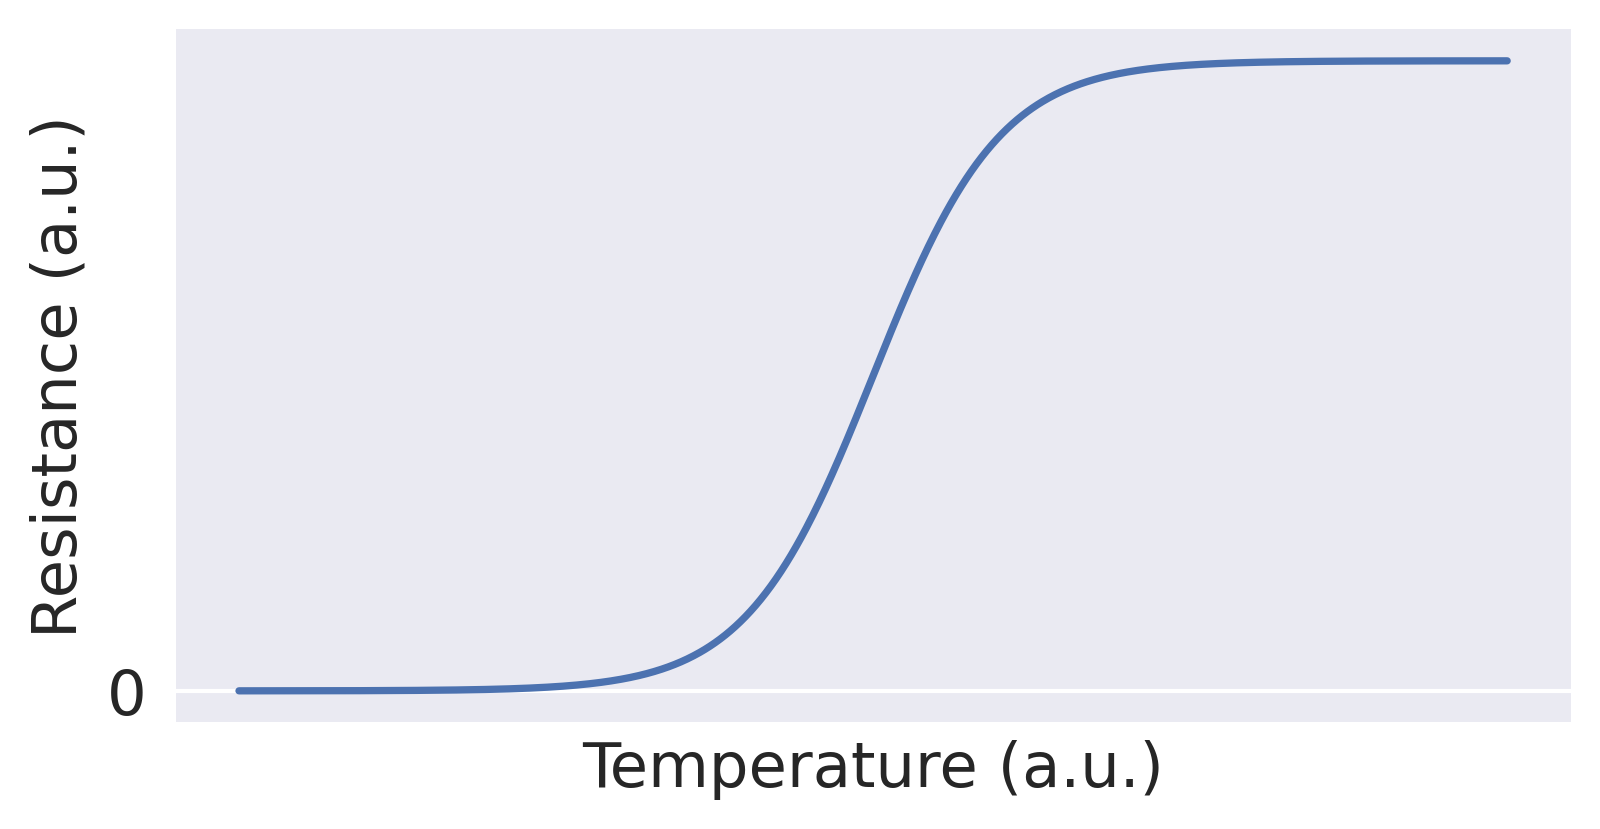

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-10*x))

x = np.linspace(-1,1,1000)

with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.plot(x, sigmoid(x))
    plt.xticks([])
    plt.yticks([0])
    plt.xlabel('Temperature (a.u.)')
    plt.ylabel('Resistance (a.u.)')
    plt.savefig('assets/TransitionEdge.png', bbox_inches='tight')
    plt.show()

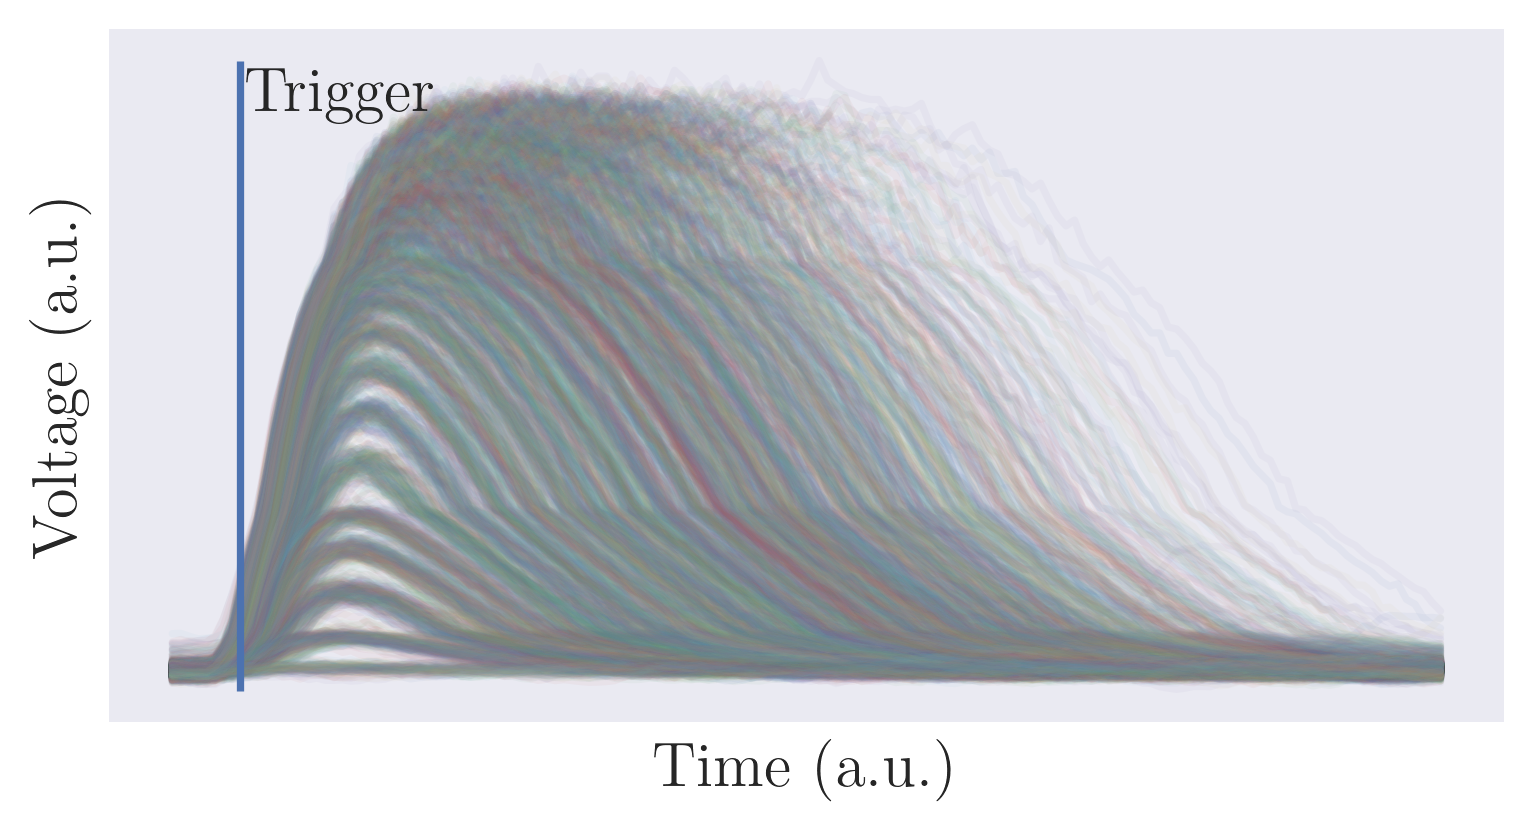

In [6]:
with plt.style.context(STYLE):
    rcParams['text.usetex'] = LATEX
    plt.figure(figsize=(6,3), dpi=300)
    plt.plot(data_train[::10].T,alpha=0.05)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.vlines(8,ymin=0,ymax=1)
    plt.text(x = 8.6, y = 0.92, s = 'Trigger')
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/TracesUniform.png', bbox_inches='tight')
    plt.show()

In [7]:
data_train[::10].shape

(3055, 150)

## Problem Formulation

In [8]:
Y_MAX = max_value(data_poisson, filtering=True)
condition = (Y_MAX < 0.7).flatten()
Y_MAX_ex = Y_MAX[condition]
X_MAX_ex = data_poisson[condition]

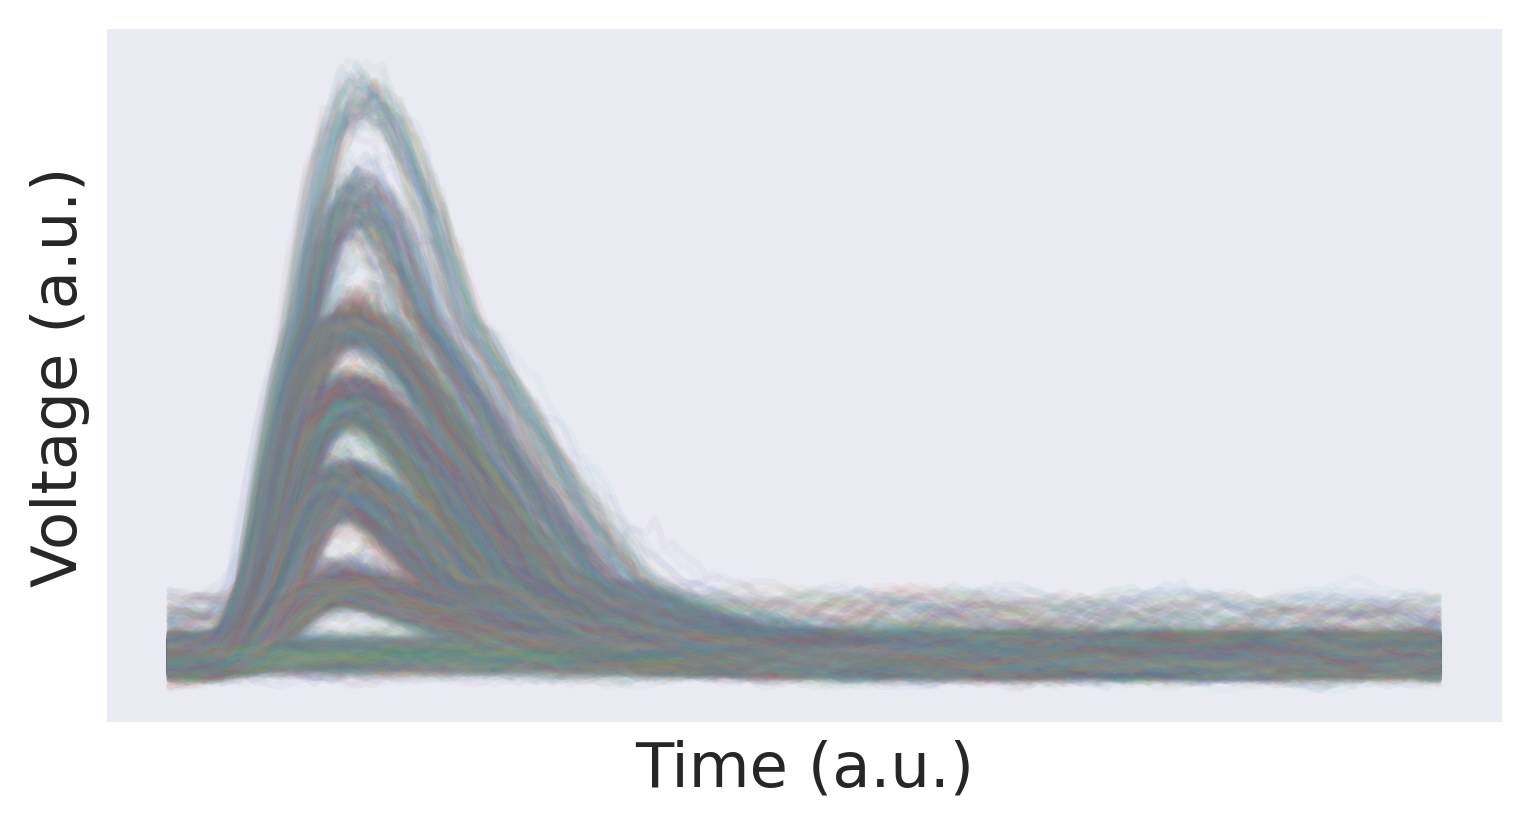

In [9]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.plot(X_MAX_ex[1::2].T,alpha=0.05)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/TracesPoisson.png', bbox_inches='tight')
    plt.show()

## Historical Methods

### Maximum value

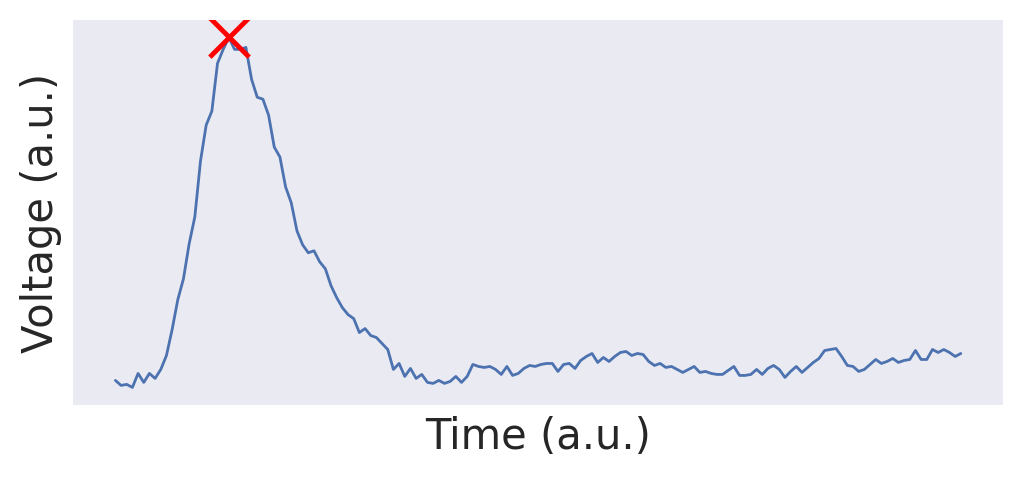

In [10]:
arg_max = np.argmax(data_test[IDX])

with plt.style.context(STYLE):
    plt.figure(figsize=(6,2.5), dpi=200)
    plt.scatter(arg_max, data_test[IDX,arg_max],s=200, marker="x", zorder=10, c="r")
    plt.plot(data_test[IDX], linewidth=1, alpha=1)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Trace_MAX.svg',format="svg", transparent=True)
    plt.show()

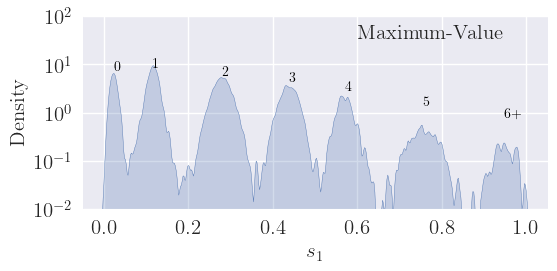

In [11]:
gm = gaussian_mixture(Y_MAX_ex,
                    X_MAX_ex,
                    means_init = None,
                    number_cluster = 7,
                    cluster_iter = 10,
                    info_sweep = 0,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 2.5,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.08,
                plot_gaussians = False,
                plot_scale = 'log',
                text = 'Maximum-Value',
                save_path = 'assets')

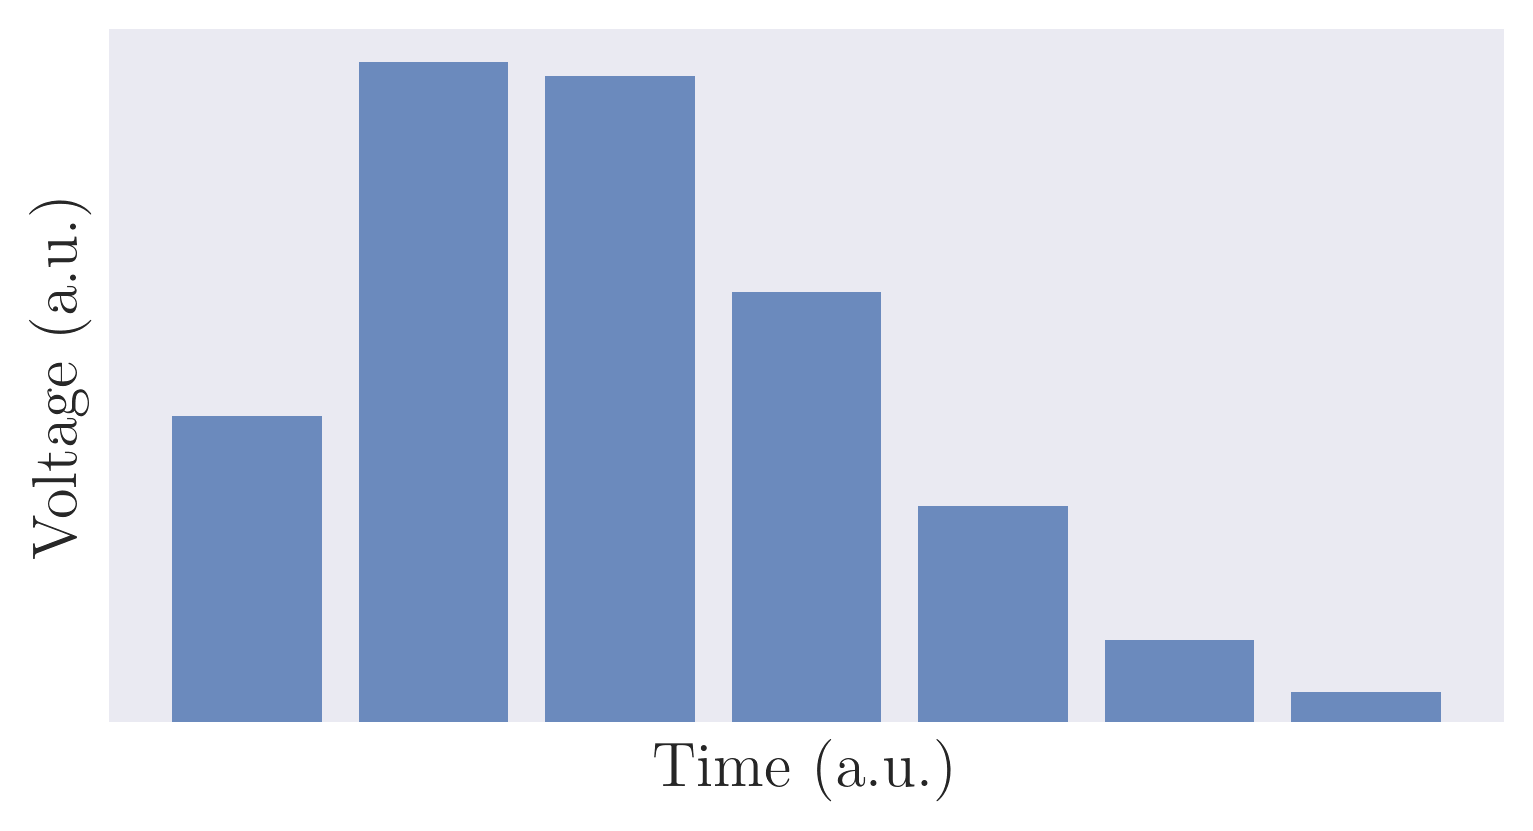

In [12]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.bar(np.arange(7),np.bincount(gm.labels),alpha=0.8)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Distribution_MAX.svg', bbox_inches='tight')
    plt.show()

### Area

In [13]:
X_AREA_ex  = area(data_poisson, filtering = True, plot_filter = False, threshold = 0.04)

In [14]:
X_AREA_ex.shape

(10240, 1)

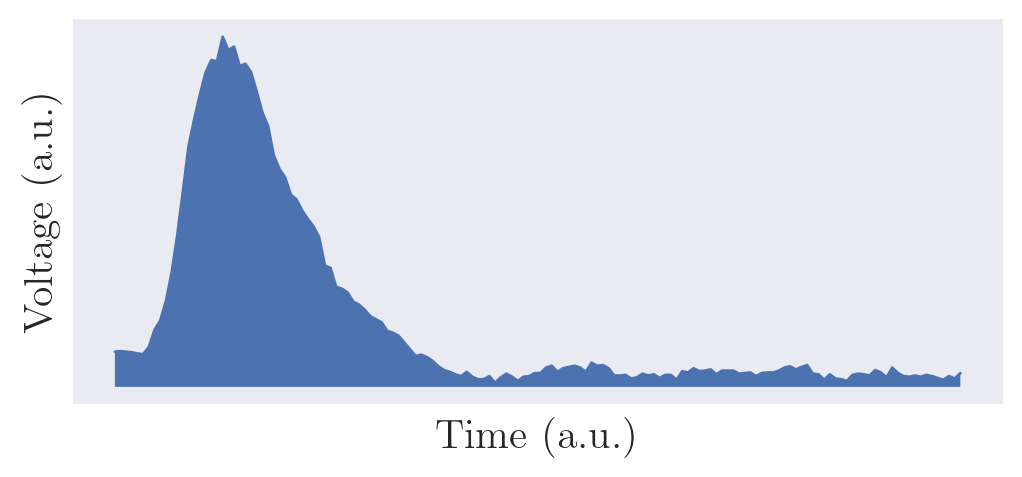

In [15]:
threshold = 0.04
#data_poisson[data_poisson < threshold] = threshold

with plt.style.context(STYLE):
    plt.figure(figsize=(6,2.5), dpi=200)

    plt.plot(TIME, data_poisson[IDX], linewidth=1, alpha=1)
    plt.fill_between(TIME, data_poisson[IDX], threshold)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Trace_AREA.svg',format="svg", transparent=True)
    plt.show()

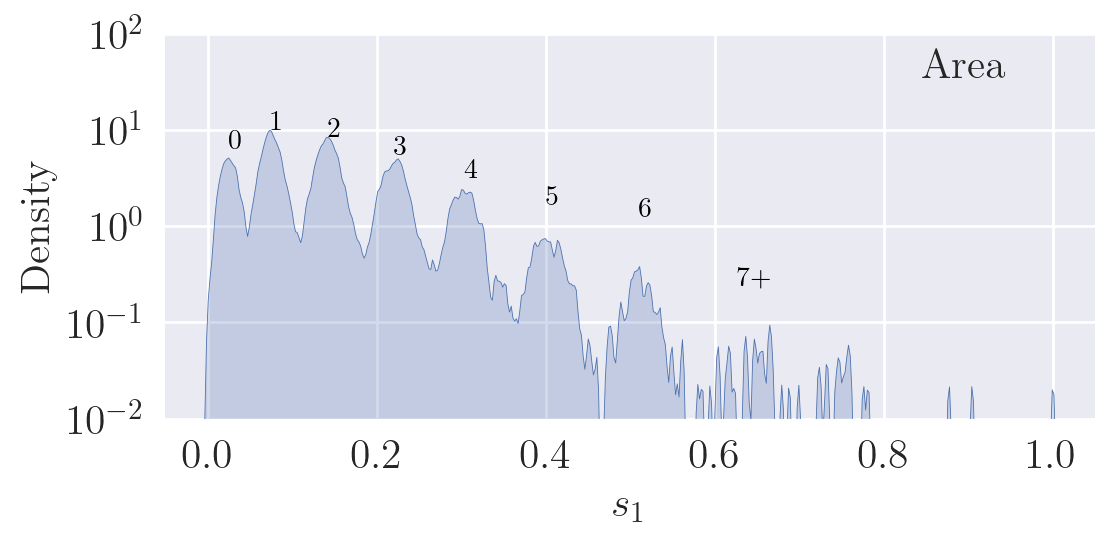

In [16]:
gm = gaussian_mixture(X_AREA_ex,
                    data_poisson,
                    means_init = None,
                    number_cluster = 8,
                    cluster_iter = 10,
                    info_sweep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 2.5,
                    dpi = 200,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = False,
                plot_scale = 'log',
                text = 'Area',
                save_path = 'assets')

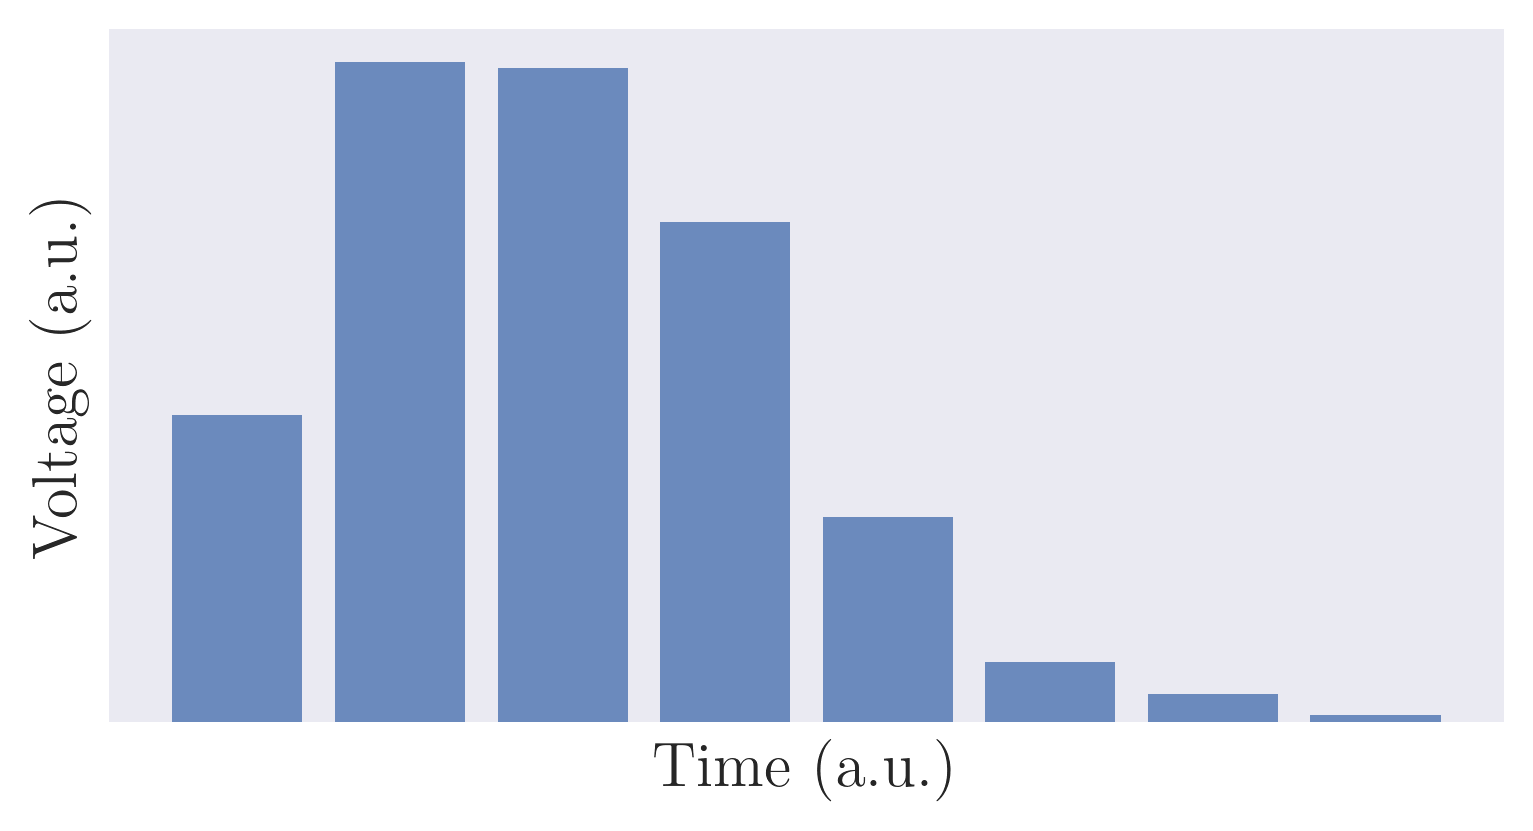

In [17]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.bar(np.arange(8),np.bincount(gm.labels),alpha=0.8)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Distribution_AREA.svg', bbox_inches='tight')
    plt.show()

### PCA

In [18]:
X_PCA = PCA(n_components=1).fit_transform(data_poisson)

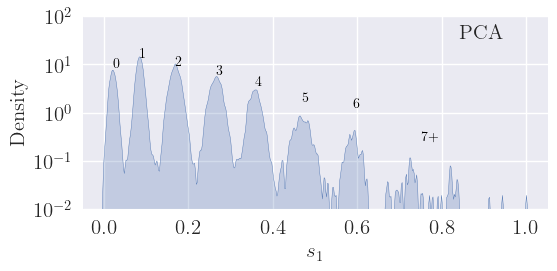

In [20]:
gm = gaussian_mixture(X_PCA,
                    data_poisson,
                    means_init = None,
                    number_cluster = 8,
                    cluster_iter = 10,
                    info_sweep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 2.5,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.1,
                plot_gaussians=False,
                plot_scale='log',
                text = 'PCA',
                save_path = 'assets')


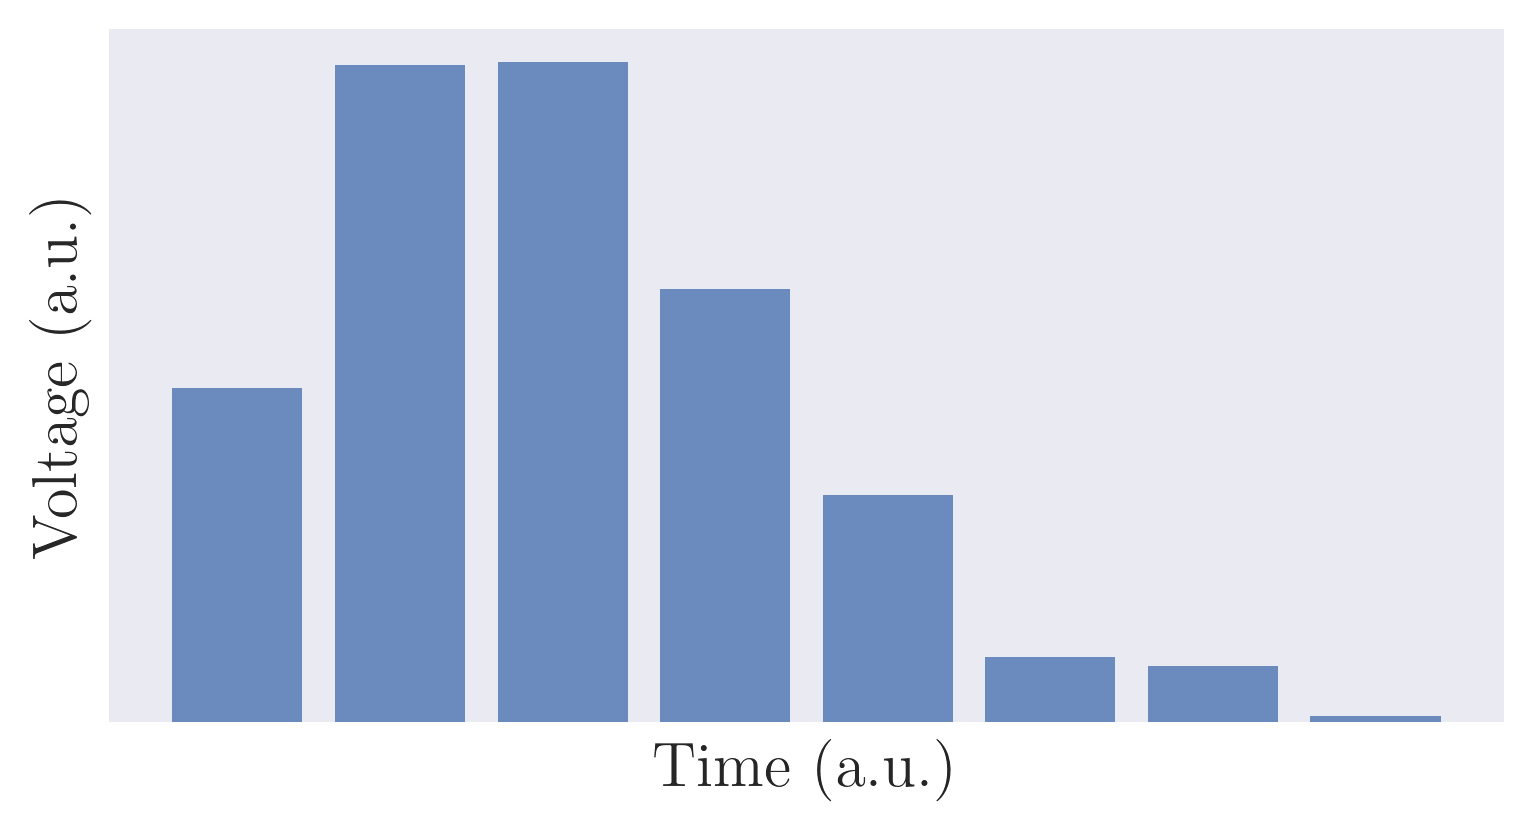

In [21]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.bar(np.arange(8),np.bincount(gm.labels),alpha=0.8)
    plt.ylabel("Voltage (a.u.)")
    plt.xlabel("Time (a.u.)")
    plt.yticks([])
    plt.xticks([])
    plt.savefig('assets/Distribution_PCA.svg', bbox_inches='tight')
    plt.show()

In [21]:
file_ = '/TSNE_{n_components 1, perplexity 450}.npy'
X_l_TSNE = np.load(f"{PATH_LD}{file_}")

In [22]:
gm = gaussian_mixture(X_l_TSNE,
                    data_test,
                    means_init = None,
                    number_cluster = 26,
                    cluster_iter = 10,
                    info_smulti_gaussian[index,:,:] = weight * multivariate_normal(mean = mean, cov = covariance).pdf(pos)weep = 0,
                    tol = 1e-5,
                    plot_sweep = True,
                    width_plot = 10,
                    height_plot = 3,
                    dpi = 100,
                    style = STYLE,
                    latex = LATEX)

gm.plot_density(bw_adjust = 0.01,
                plot_gaussians=True,
                plot_scale='log')

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1329335287.py, line 6)

### Example figures

In [ ]:
weights = [1]

 = dataset_TES(weights = weights,
                                                path_test = r'C:\Users\dalbe\Documents\Backup datasets\TES\NIST test/',
                                                path_train = r'C:\Users\dalbe\Documents\Backup datasets\TES\NIST train/',
                                                signal_size = 8192,
                                                interval = [0,350],#270],
                                                order_dB = False,
                                                normalize = True,
                                                plot_expected = False,
                                                plot_traces = False,
                                                n_photon_number = 50)

In [3]:
X_l_MAX = max_value(data_test, filter=True)
condition = X_l_MAX[:,0] < 1

In [ ]:
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,3), dpi=100)
    plt.plot(data_test.T[:,condition][:100,::20],
                alpha = 0.05,
                linewidth = 1)
    plt.xlabel('Time (a.u.)')
    plt.ylabel('Voltage (a.u.)')
    plt.show()

In [ ]:
name_method = 'MAX'
gm = gaussian_mixture(X_l_MAX[condition], 
                    data_test[condition],
                    means_init = np.array([0,.1,.2,.3,.4,.5,.7,.8,.9,1]).reshape(-1,1),
                    number_cluster = 10,
                    cluster_iter = 10,
                    info_sweep = 0,
                    plot_sweep = True,
                    width_plot = 6,
                    height_plot = 3,
                    dpi = 100)

gm.plot_density(bw_adjust = 0.03,
                plot_gaussians=False,
                plot_scale='linear')

In [ ]:
hist, x = np.histogram(gm.labels, bins=9)
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,3), dpi=100)
    plt.bar(x[:-1], hist, alpha = 0.5)
    plt.locator_params(nbins=10)
    plt.ylabel('Counts')
    plt.xlabel('Photon number')
    
    plt.show()